In [1]:
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import random
from sklearn.discriminant_analysis import StandardScaler
import os
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN, AgglomerativeClustering


In [8]:
morf = pd.read_csv("C:/Users/wsach/OneDrive/Desktop/TRAFFIC_PROJECT/Traffic_prediction_i-70_proj/different_umap/umap_without_MorF_data.csv")

In [9]:
morf.head()

,0,1
0,-4.453394,18.643797
1,5.512941,5.930380
2,-4.449939,18.636827
3,5.530972,5.927375
4,5.563743,12.729339


Text(0.5, 1.0, 'Umap of data without MorF variable')

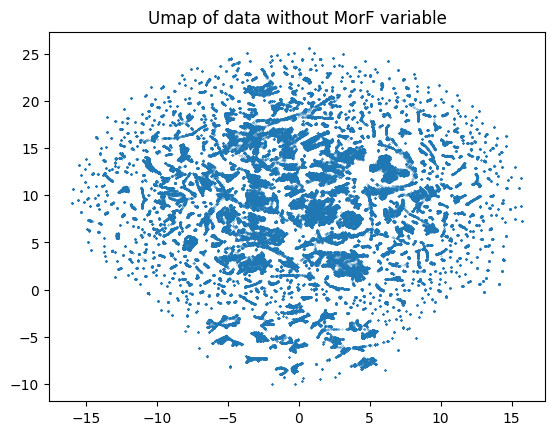

In [ ]:
plt.Figure(figsize=(100,100))
plt.scatter(morf['0'].to_numpy(), morf['1'].to_numpy(), s=0.05)
plt.title('Umap of data without MorF variable')

In [20]:
true_data = pd.read_csv('C:/Users/wsach/OneDrive/Desktop/TRAFFIC_PROJECT/Traffic_prediction_i-70_proj/traffic_data/TRUE_DATA.csv')

In [36]:
true_data = true_data.fillna(-1)

In [ ]:
morf_crashes = morf[true_data['Driver Age'] != -1.0]

,0,1
4,5.563743,12.729339
5,7.078924,12.729468
16,7.555562,16.740831
17,7.584985,16.698780
20,7.563916,16.738928


In [39]:
len(morf_crashes)

9667

In [ ]:
morf_crashes_numpy = morf_crashes.to_numpy()

In [45]:
morf_crashes_numpy

array([[ 5.563743 , 12.729339 ],
       [ 7.0789237, 12.729468 ],
       [ 7.5555625, 16.740831 ],
       ...,
       [ 7.4584627, 16.83244  ],
       [ 7.447311 , 16.82879  ],
       [ 7.4300265, 16.850496 ]])

In [41]:
AC_data = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
AC_data.fit(morf_crashes_numpy)
predictions_AC = AC_data.labels_

Text(0.5, 1.0, 'Umap of data without MorF variable')

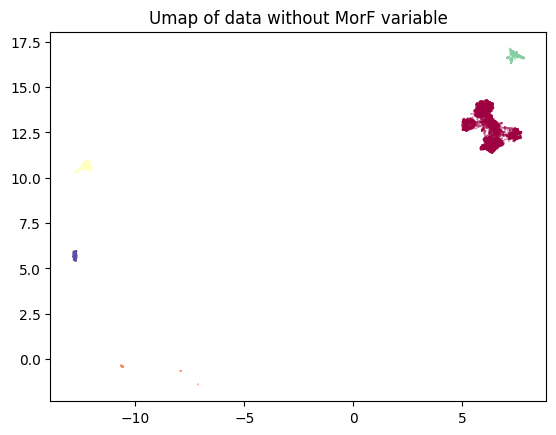

In [47]:
plt.Figure(figsize=(100,100))
plt.scatter(morf_crashes_numpy[:,0], morf_crashes_numpy[:,1], c=predictions_AC, cmap="Spectral", s=0.05)
plt.title('Umap of data without MorF variable')

### Testing Traffic

Text(0.5, 1.0, 'Umap of data without MorF variable')

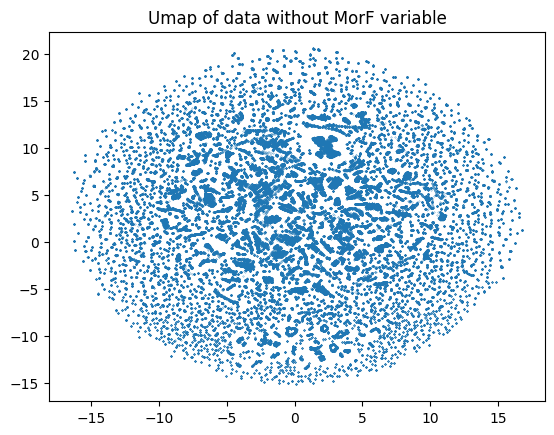

In [48]:
traffic = pd.read_csv('C:/Users/wsach/OneDrive/Desktop/TRAFFIC_PROJECT/Traffic_prediction_i-70_proj/different_umap/umap_without_TRAFFIC_data.csv')

plt.Figure(figsize=(100,100))
plt.scatter(traffic['0'].to_numpy(), traffic['1'].to_numpy(), s=0.05)
plt.title('Umap of data without MorF variable')

### Making color coded umap values

In [51]:
x = ['Date','Direction','Time','TRAFFIC','PRCP','SNOW','SNWD','SNOW_DAY_SUM','Vehicles','Driver Age','Condition_Code','MorF']
parent_folder = 'C:/Users/wsach/OneDrive/Desktop/TRAFFIC_PROJECT/Traffic_prediction_i-70_proj/different_umap'

for variable in x:
    new_folder_name = f'without_{variable}'
    full_path = os.path.join(parent_folder, new_folder_name)
    os.makedirs(full_path, exist_ok=True)
    data = pd.read_csv(f'C:/Users/wsach/OneDrive/Desktop/TRAFFIC_PROJECT/Traffic_prediction_i-70_proj/different_umap/umap_without_{variable}_data.csv')
    data_numpy = data.to_numpy()
    for y in x:
        if y != variable:
            colors = pd.factorize(true_data[y])[0]
            scat = plt.scatter(data_numpy[:,0], data_numpy[:,1], c=colors, cmap='Spectral', s=0.1)
            plt.colorbar(scat, label=f'{y}')
            plt.title(f'Without {variable} as {y}')
            filename = f'{full_path}/{variable}_as_{y}.png'
            plt.savefig(filename)
            plt.close()